<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), 28, 28, 1))#linhas, colunas e canais
previsores_teste = previsores_teste.reshape((len(previsores_teste), 28, 28, 1))#linhas, colunas e canais

In [0]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
autoencoder = Sequential()

In [5]:
#encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu',
                       input_shape = (28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))# se nao colocar o parametro same quando executar ira dar erro
autoencoder.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))#pois este parametro indica como que a imagem sera passado, o seu formato no caso, que é linhas, colunas e canais
#4, 4, 8
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same',
                       strides = (2, 2)))#strides idicas de quantos em quantos pixels a imagem anda, 2, 2 nesse caso
#aqui não vai maxpooling porque é o final da rede neural
autoencoder.add(Flatten())#transforma de formato matriz para uma lista com 128 posiçoes pois 4 * 4 * 8 == 128

autoencoder.add(Reshape((4, 4, 8)))#volta a lista para uma matriz 4, 4, 8

In [6]:
#decoder
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))#para o ultimo não podemos preencher o padding same pois a dimensão de saida sera diferente da dimensão de entrada graças a ele
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same'))#retorna a imagem decodificada já

In [7]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

In [8]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 20, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 76s 1ms/step - loss: 0.2586 - acc: 0.7966 - val_loss: 0.1647 - val_acc: 0.7952
Epoch 2/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1490 - acc: 0.7996 - val_loss: 0.1364 - val_acc: 0.8039
Epoch 3/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1301 - acc: 0.8052 - val_loss: 0.1233 - val_acc: 0.8066
Epoch 4/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1208 - acc: 0.8078 - val_loss: 0.1165 - val_acc: 0.8072
Epoch 5/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1150 - acc: 0.8091 - val_loss: 0.1116 - val_acc: 0.8089
Epoch 6/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1111 - acc: 0.8100 - val_loss: 0.1091 - val_acc: 0.8102
Epoch 7/20
60000/60000 [

In [13]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_1').output)#pega a cada que voce deseja, no caso flatten_1 é a camada que faz o encoder final do programa
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0   

In [0]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

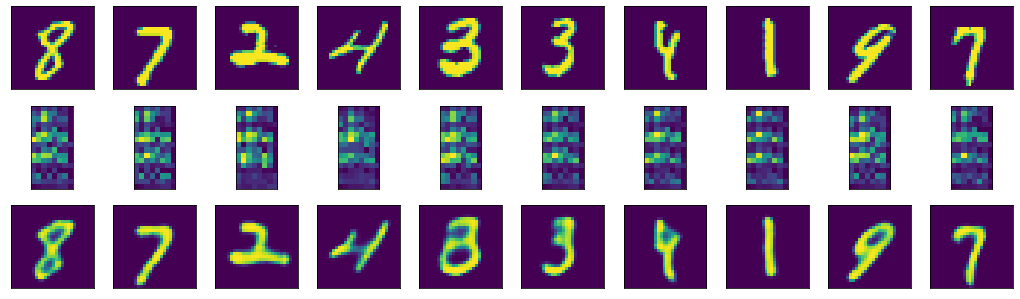

In [15]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)# seleciona 10 imagens e um intervalo de 0 a 10000
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
  # imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())
    
  # imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 8))
  plt.xticks(())
  plt.yticks(())
    
  # imagem reconstruÃ­da
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())